<span style="color: red">**TILO**</span>: Das ist im Moment eine Kopie, this is currently a copy: [Demo notebook of binder examples
](https://github.com/binder-examples/demo-julia/tree/581378d6c09d097b2d3c1c2ce0287d6f3a0e5769)

**NOTE**: This is a Julia demo for Binder, it's been adapted from the Julia demo on the nbconvert website.

Binder is an open-source project and Julia support is early in development. If you'd like to improve Julia support in Binder, see our issue on adding Julia support here: https://github.com/jupyter/repo2docker/issues/23. We'd love to hear from you!

# An IJulia Demo

This notebook uses **IJulia**: a [Julia-language](http://julialang.org/) backend combined with the [IPython](http://ipython.org/) interactive environment.   This combination allows you to interact with the Julia language using IPython's powerful [graphical notebook](http://ipython.org/notebook.html), which combines code, formatted text, math, and multimedia in a single document.

## Basic Julia interaction

Basic mathematical expressions work like you expect:

In [1]:
1 + sin(3)

1.1411200080598671

You can define variables, write loops, and execute arbitrary multiline code blocks.  Here is an example of an alternating harmonic series $\sum_{n=1}^\infty \frac{(-1)^n}{n}$ from a [Julia tutorial by Homer Reid](http://homerreid.ath.cx/teaching/18.330/JuliaProgramming.shtml#SimplePrograms):

In [2]:
s = 0.0
for n = 1:2:10000
    s += 1/n - 1/(n+1)
end
s # an expression on the last line (if it doesn't end with ";") is printed as "Out"

0.6930971830599458

Previous outputs can be referred to via `Out[`*n*`]`, following the IPython, for example `Out[2]` for the result above.  You can also use the shorthand `_2`, or `_` for the previous result, as in IPython.  Like in Matlab, `ans` can also be used to refer to the previous result, *even if it was not printed* (when the command ended with `;`).

For example, the harmonic series above should be converging (slowly) to $\ln 2$, and we can check this:

In [3]:
Out[2] - log(2)

-4.9997499999454575e-5

Like Matlab or Scipy + Numpy, Julia has lots of mathematical functions and linear algebra built in.  For example, we can define a $500\times500$ random matrix $R$ and form the positive-definite matrix $R^* R$:

In [4]:
R = rand(500,500)
R' * R

500×500 Matrix{Float64}:
 162.694  119.928  126.023  123.268  …  123.146  128.961  123.729  130.367
 119.928  166.638  126.642  122.861     118.996  127.61   125.786  126.689
 126.023  126.642  170.081  128.745     124.455  129.441  131.539  126.578
 123.268  122.861  128.745  166.534     125.13   126.343  129.362  125.498
 123.744  122.995  128.898  125.533     122.007  130.75   124.687  123.795
 126.171  125.27   124.353  122.994  …  124.823  128.625  124.054  129.354
 128.014  129.066  132.125  129.765     123.526  135.769  133.33   131.34
 129.652  130.679  134.875  135.132     127.032  134.606  129.951  134.239
 118.964  119.987  118.964  121.88      114.897  124.922  119.082  123.744
 123.629  124.299  127.164  126.369     124.739  127.255  124.948  124.826
 120.213  120.444  123.448  122.599  …  115.548  125.606  120.875  121.511
 123.64   120.222  125.854  124.15      115.552  128.113  123.977  125.323
 125.536  123.678  128.688  128.341     123.23   130.359  128.322  130.942
 

(Notice that, by default, only a portion of a large matrix is shown.  You didn't really want to read $500^2 = 250,000$ numbers, did you?)

Standard output from Julia is also captured and sent to the IJulia notebook as you'd expect:

In [5]:
println("Hello world!\n")
println(stderr, "Börk börk börk, some unicode output on stderr...\n")

Hello world!



Börk börk börk, some unicode output on stderr...



IJulia even captures output from external C libraries (and notice how easy it is using Julia's `ccall` intrinsic):

In [6]:
ccall(:printf, Cint, (Ptr{UInt8},), "Hello from C!!\n");

Hello from C!!


We can define functions, of course, and use them in later input cells:

In [7]:
f(x) = x .+ 1

f (generic function with 1 method)

In [8]:
println(f(3))
f([1,1,2,3,5,8])

4


6-element Vector{Int64}:
 2
 2
 3
 4
 6
 9

Notice that the input above both printed an scalar to `STDOUT` and also returned a vector, the latter using Julia's ability to write polymorphic functions and built-in array operations.

On the other hand adding a string to a number is not defined (there is no `+` method defined for those types, although we could easily add one), and attempting to do so will throw an exception:

In [9]:
f("Hello?")

LoadError: MethodError: no method matching +(::String, ::Int64)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /usr/share/julia/base/operators.jl:655
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /usr/share/julia/base/int.jl:87
[0m  +([91m::T[39m, ::Integer) where T<:AbstractChar at /usr/share/julia/base/char.jl:237
[0m  ...

# Interactive Plotting in IJulia

Below we'll show off some plotting using the excellent Gadfly package. The plots are heavily inspired by [this blog post](http://int8.io/basic-visualization-in-julia-gadfly/).

<span style="color: red">**TILO**</span>: die beiden Pakete `RDatasets` und `Gadfly` sind noch nicht installiert. 
Die würden eigentlich in die Datei `JuliaProject.toml` gehören.
Nun importieren wir die Julia-Pakete hier mauell.

In [22]:
using Pkg
if ! in("RDatasets", keys(Pkg.installed())) Pkg.add("RDatasets") end
if ! in("Gadfly", keys(Pkg.installed())) Pkg.add("Gadfly") end
for (pkg, ver) in Pkg.installed() println("Pkg: $pkg,\tVersion: $ver") end

Pkg: IJulia,	Version: 1.23.2
Pkg: RDatasets,	Version: 0.7.7
Pkg: Gadfly,	Version: 1.3.4


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /build/julia/src/julia-1.7.1/usr/share/julia/stdlib/v1.7/Pkg/src/Pkg.jl:595
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /build/julia/src/julia-1.7.1/usr/share/julia/stdlib/v1.7/Pkg/src/Pkg.jl:595
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /build/julia/src/julia-1.7.1/usr/share/julia/stdlib/v1.7/Pkg/src/Pkg.jl:595


In [11]:
using RDatasets
sleep = dataset("lme4","sleepstudy")

,Reaction,Days,Subject
,Float64,Int32,Cat…
1,249.56,0,308
2,258.705,1,308
3,250.801,2,308
4,321.44,3,308
5,356.852,4,308
6,414.69,5,308
7,382.204,6,308
8,290.149,7,308
9,430.585,8,308


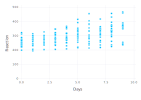

In [12]:
using Gadfly
plot(sleep, x = "Days", y = "Reaction", Geom.point)

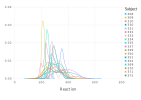

In [13]:
plot(sleep, x = "Reaction", Geom.density, color = "Subject", Scale.x_continuous(minvalue= 0, maxvalue= 500))

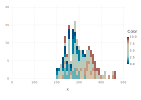

In [14]:
plot(x = sleep[!, :Reaction], Geom.histogram(bincount = 30), Scale.x_continuous(minvalue = 200), color = sleep[!, :Days])

## Multimedia display in IJulia

Like most programming languages, Julia has a built-in `print(x)` function for outputting an object `x` as text, and you can override the resulting text representation of a user-defined type by overloading Julia's `show` function.  The next version of Julia, however, will extend this to a more general mechanism to display **arbitrary multimedia representations** of objects, as defined by standard [MIME types](https://en.wikipedia.org/wiki/Internet_media_type).   More specifically, the Julia [multimedia I/O API](http://docs.julialang.org/en/latest/stdlib/base/#multimedia-i-o) provides:

* A `display(x)` function requests the richest available multimedia display of a Julia object x (with a `text/plain` fallback).
* Overloading `writemime` allows one to indicate arbitrary multimedia representations (keyed by standard MIME types) of user-defined types.
* Multimedia-capable display backends may be registered by subclassing a generic `Display` type.  IJulia provides one such backend which, thanks to the IPython notebook, is capable of displaying HTML, LaTeX, SVG, PNG, and JPEG media formats.

The last two points are critical, because they separate **multimedia export** (which is defined by functions associated with the originating Julia data) from **multimedia display** (defined by backends which know nothing about the source of the data).

Precisely these mechanism were used to create the inline PyPlot plots above.   To start with, the simplest thing is to provide the MIME type of the data when you call `display`, which allows you to pass "raw" data in the corresponding format:

In [15]:
display("text/html", """Hello <b>world</b> in <font color="red">HTML</font>!""")

Hello world in HTML !

However, it will be more common to attach this information to types, so that they display correctly automatically.  For example, let's define a simple `HTML` type in Julia that contains a string and automatically displays as HTML (given an HTML-capable backend such as IJulia):

In [23]:
mutable struct HTML
   s::String
end

Base.show(io::IO, ::MIME"text/html", x::HTML) = print(io, x.s)

Here, `Base.show` is just a function that writes `x` in the corresponding format (`text/html`) to the I/O stream `io`.

This `show` definition is all that we need to make any object of type `HTML` display automatically as HTML text in IJulia:

In [24]:
x = HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")

In [25]:
display(x)
println(x)

HTML("<ul> <li> Hello from a bulleted list! </ul>")

HTML("<ul> <li> Hello from a bulleted list! </ul>")
